# Reference:
1. https://www.kaggle.com/code/rutvikdeshpande/fashion-mnist-cnn-beginner-98/notebook
2. https://pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/
3. https://towardsdatascience.com/how-to-visualize-neural-network-architectures-in-python-567cd2aa6d62

In [ ]:
'''
install the library to download and extract images from MNIST dataset
'''
! pip install get-mnist
! pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 17.7 MB/s eta 0:00:00


In [ ]:
'''
load the dataset
x, y: images and labels for training phase
x_test, y_test: images and label for test phase
'''

from mnist import fashion_mnist
x, y, x_test, y_test = fashion_mnist('FASHION_MNIST')
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)
print('labels:', label_names)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
print(x[0])
print(y[0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
    0.  13.  73.   0.   0.   1.   4.   0.   0.   0.   0.   1.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   0.
   36. 136. 127.  62.  54.   0.   0.   0.   1.   3.   4.   0.   0.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.   0.
  102. 204. 176. 134. 144. 123.  23.   0.   0.   0.   0.  12.  10.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  155. 236. 207. 178. 107. 156. 161. 109.  64.  23.  77. 1

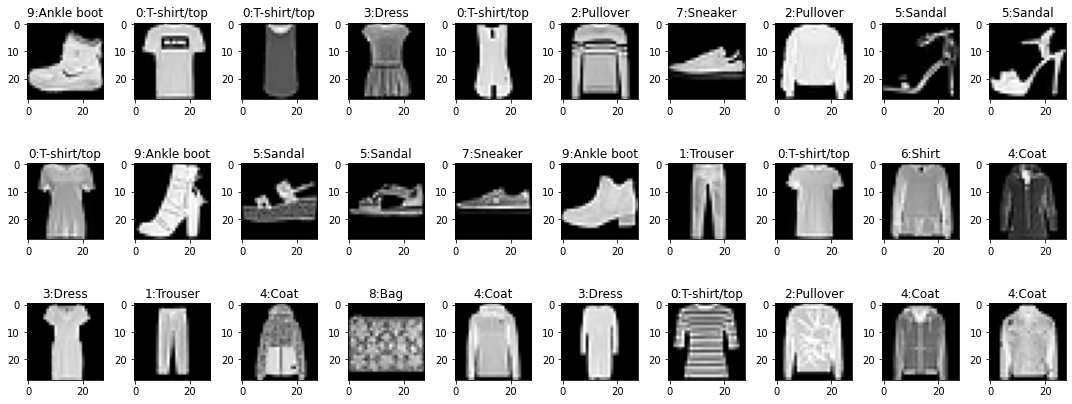

In [ ]:
'''
illustrate several images and corresponding labels in the training set
'''

import matplotlib.pyplot as plt

num_row = 3
num_col = 10
num = num_row * num_col

fig, axes = plt.subplots(num_row, num_col,
                        figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x[i], cmap='gray')
    ax.set_title('%d:%s'%(y[i], label_names[y[i]]))
plt.tight_layout()
plt.show()

# Approach Description

In this project, I use the Convolutional Neural Networks (CNNs) model to resolve the tasks.

CNNs are a special class of neural network that excel at image and video recognition tasks. Using a sequence of layers to process the input data and using the output of each layer as the input for the subsequent layer, CNNs are a sort of feedforward neural network.

CNNs have many uses in a variety of industries, including as image and video identification, natural language processing, autonomous driving, and more. CNNs have been used in image and video identification to recognize objects and faces as well as to perform operations like image classification, segmentation, and detection. They have also been employed in machine translation, text categorization, and other aspects of natural language processing. CNNs have been employed in autonomous cars to identify and track objects as well as to provide data into decision-making systems. Because of their adaptability and capacity to learn intricate characteristics from unprocessed data, CNNs are effective tools for a variety of applications.

# Theoretical Explanation

The hierarchical feature extraction concept, in particular, is the foundation of the CNN algorithm, which is based on the principles of the human visual system. From simple edges to more complicated patterns like forms and objects, the visual system is made up of a series of layers that extract elements of increasing complexity.

The CNN algorithm is made up of layers that extract features in a hierarchical fashion from the input data. Convolutional layers, pooling layers, and fully linked layers make up a CNN's primary building blocks.

The foundational part of a CNN is the convolutional layer. The input data is subjected to a series of filters, each of which is intended to identify a particular property of the input. The result of each of these filters is merged with the outputs of the other filters to produce a feature map after being applied to tiny areas of the input. The filters are often trained using a technique known as backpropagation, which modifies the filter weights to reduce the discrepancy between the output anticipated and the output actually received.

The output of the convolutional layer is downsampled using the pooling layer. This aids in lowering the data's dimensionality, which in turn lowers the network's computational complexity. Max pooling, which extracts the largest value from a limited area of the feature map, is the most used kind of pooling and the one that is used in this project.

The fully connected layer, which is the last layer of the network, uses the output from the layer before it to generate a prediction. This layer resembles the layers in a conventional neural network in that every neuron in the layer before it is linked to every other neuron in the layer above. In order to modify the weights of the filters in the convolutional layers, the output of this layer is compared to the intended output and the error is backpropagated through the network.

Finally, a softmax layer is applied to the output of the fully connected layers, producing a probability distribution over all conceivable classes or categories of the input data. For predicting the input data, such as when detecting an item in an image or identifying speech in an audio clip, this distribution is employed.

In [ ]:
import numpy as np # linear algebra
from keras.optimizers import Adam,RMSprop, SGD
from keras import  backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Lambda, BatchNormalization, InputLayer
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical, plot_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import visualkeras
from keras.utils import plot_model

NUM_EPOCHS = 50
BS = 32

# Data processing

First, I converts the train set and test set target variable y into categorical format with 10 classes - the numbers of categories for the Fashion MNIST problem.

Sceondly, the train data is split into training and validation sets using a test size of 0.2 and a random state of 13.

Thirdly, the input data x is reshaped into a 4D array to match the input shape required by the CNN model.

Last but not least, the data is also normalized by dividing each pixel value by 255 to scale the values between 0 and 1.

In [ ]:
'''
TODO 01: data preprocessing.
Currently, the input x is a matrix with shape (60000, 28, 28) --> a list with 60000 elements which are 28x28 image/matrices
You can utilize the original shape of each image (28x28) or transform them into vectors (784) based on your approaches.
Each pixel in an image is in a 0-255 range.
You can utilize the original pixel range or scale image pixels into the 0.0-1.0 range base on your approaches.
Other methods for data preprocessing are highly encouraged.
'''
y = to_categorical(y,10)
y_test = to_categorical(y_test,10)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=13)

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Model Structure

In [ ]:
'''
TODO 02: create a classification model
hint: Decission Tree, Random Forest, KNN, SVM, Neural Networks, etc.
      Library: scikit-learn, tensorflow/pytorch (they are complicated, consider carefully in advance)
      FYI: https://scikit-learn.org/stable/getting_started.html
'''

model=Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_13 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_14 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                      


The model includes 4 convolutional layers with increasing numbers of filters and max pooling to reduce the dimensionality of the data. The model also has fully connected layers with relu activation, batch normalization, and dropout.

The first layer is a convolutional layer with 32 filters, each of size (3, 3). This layer applies the filters to the input data and generates 32 feature maps, each representing a different feature of the input data. The 'padding=same' argument ensures that the output size of this layer is the same as the input size. The activation function used in this layer is ReLU, which helps to introduce non-linearity into the network.

After the convolutional layer, there is a batch normalization layer that helps to normalize the output of the previous layer, making it easier for the subsequent layers to learn. The second convolutional layer has 64 filters, and it also has a 'padding=same' argument and ReLU activation function.

The next layer is a max pooling layer with a pool size of (2, 2), which reduces the spatial dimensions of the input data by taking the maximum value within each 2x2 region of the feature maps. This helps to reduce the computational complexity of the network.

The next set of layers consist of two more convolutional layers, each with 128 filters of size (3, 3). Both of these layers have a 'padding=same' argument and ReLU activation function. The second of these convolutional layers is followed by another max pooling layer with a pool size of (2, 2), and a dropout layer with a rate of 0.25, which randomly drops out 25% of the activations to prevent overfitting.

The final layers are fully connected layers that take the flattened output of the previous convolutional layers and generate a prediction. The first fully connected layer has 512 neurons with ReLU activation function, followed by batch normalization layer and a dropout layer with a rate of 0.5. The second fully connected layer has 128 neurons with ReLU activation function, followed by another batch normalization layer and a dropout layer with a rate of 0.5. The final layer is a softmax layer with 10 neurons, one for each class in the dataset.

The model is compiled with the Adam optimizer, which is an adaptive learning rate optimization algorithm that helps to converge faster than traditional stochastic gradient descent. The loss function used is categorical cross-entropy, which is suitable for multi-class classification problems. The model is evaluated using accuracy as the metric.

The model uses Dropout and Batch Normalization - techniques commonly used in CNNs to improve their performance and prevent overfitting.

Dropout causes the network to acquire more robust characteristics and prevents it from being overly dependent on any one particular feature by randomly removing certain neurons during training. Overfitting is lessened, and generality is enhanced.

The network becomes more stable and effective as a result of batch normalization, which normalizes the inputs to each layer and lessens the internal covariate shift issue. This leads to quicker training, improved generalization, and a decreased need for further regularization methods.

These methods have been demonstrated to enhance CNN performance in a variety of tasks, including as segmentation, object identification, and picture classification. They help CNNs to attain higher accuracy and better performance on difficult tasks by decreasing overfitting and enhancing the network's stability and efficiency.

Visual portrays of the model can be seen in the following figures below.

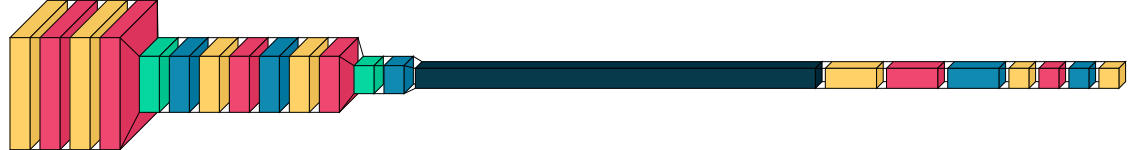

In [ ]:
visualkeras.layered_view(model)

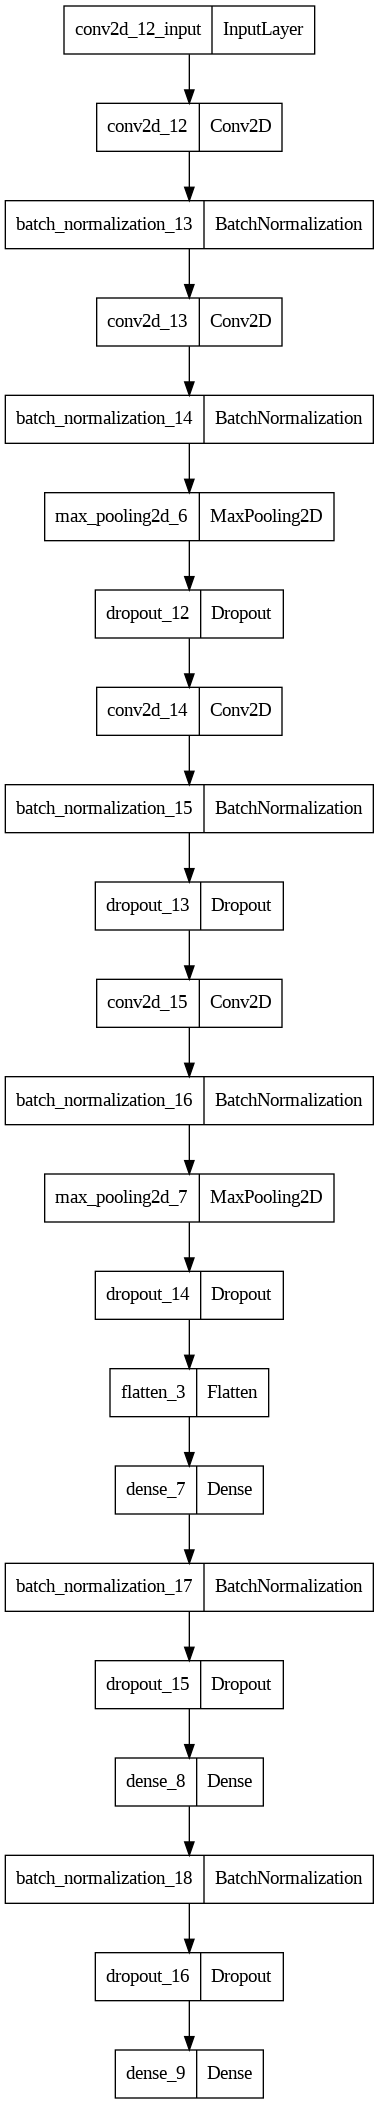

In [ ]:
plot_model(model, to_file='model.png')

# Training

In [ ]:
'''
TODO 03: train the model using the training set (x, y)
it is obligated to display the accuracy in the training set after this phase
'''

history_cnn = model.fit(x_train, y_train, epochs=NUM_EPOCHS, batch_size=BS, validation_data=(x_val, y_val))

Epoch 1/50
1500/1500 [==============================] - 20s 10ms/step - loss: 0.5503 - accuracy: 0.8096 - val_loss: 0.3135 - val_accuracy: 0.8861
Epoch 2/50
1500/1500 [==============================] - 14s 10ms/step - loss: 0.3485 - accuracy: 0.8769 - val_loss: 0.2928 - val_accuracy: 0.8903
Epoch 3/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2959 - accuracy: 0.8969 - val_loss: 0.2511 - val_accuracy: 0.9088
Epoch 4/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2739 - accuracy: 0.9038 - val_loss: 0.2353 - val_accuracy: 0.9147
Epoch 5/50
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2485 - accuracy: 0.9119 - val_loss: 0.2235 - val_accuracy: 0.9208
Epoch 6/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2324 - accuracy: 0.9173 - val_loss: 0.2209 - val_accuracy: 0.9240
Epoch 7/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2166 - accuracy: 0.9225 - val_loss: 0.2083 -

# Evaluation and proposal

In [ ]:
_, train_acc = model.evaluate(x_train, y_train)
print("Train accuracy:", train_acc * 100, "%")

_, val_acc = model.evaluate(x_val, y_val)
print("Train accuracy:", val_acc * 100, "%")

_, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc * 100, "%")

1500/1500 [==============================] - 5s 3ms/step - loss: 0.0041 - accuracy: 0.9992
Train accuracy: 99.92291927337646 %
375/375 [==============================] - 1s 4ms/step - loss: 0.2278 - accuracy: 0.9436
Train accuracy: 94.35833096504211 %
313/313 [==============================] - 2s 4ms/step - loss: 0.2415 - accuracy: 0.9433
Test accuracy: 94.33000087738037 %


In [ ]:
from sklearn.metrics import classification_report

preds = model.predict(x_test)

print("[INFO] evaluating network...")
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1),
	target_names=label_names))

313/313 [==============================] - 1s 3ms/step
[INFO] evaluating network...
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.90      0.90      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.92      0.92      0.92      1000
       Dress       0.93      0.97      0.95      1000
        Coat       0.92      0.91      0.91      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.83      0.81      0.82      1000
     Sneaker       0.96      0.99      0.98      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.99      0.97      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



The CNN model was evaluated using the Fashion MNIST dataset, and the results demonstrate its excellent level of accuracy. The model has learnt the characteristics of the dataset and is capable of making correct predictions on fresh data, as evidenced by the training accuracy of 99.92% and validation accuracy of 94.36%. The test accuracy of 94.33% demonstrates that the model is capable of generalizing effectively to new data and is not overfit to the training set.

Specifically, the model accurately predicted the trouser and bag classes, as evidenced by the greatest precision and recall scores, respectively. Also, the model did well in the classes of sandals, ankle boots, and dresses, earning high F1 scores of 0.99, 0.98, and 0.95, respectively.

The model struggled to effectively predict the shirt class, as seen by the precision of 0.83 and recall of 0.81 it obtained for this class. Similar to this, the model's F1-score for the T-shirt/top class was lower than average (0.90), suggesting room for improvement.

It is crucial to remember that the model's accuracy might change based on the complexity of the dataset and the model's design. While simpler datasets may just call for simpler models, deeper and more complicated models may be required for more complex datasets.

Using different methods including data augmentation and hyperparameter tweaking, the model's accuracy may also be increased. By applying picture changes including rotation, scaling, and flipping, data augmentation entails artificially growing the amount of the training data. In contrast, hyperparameter tuning can optimize the performance of the model by adjusting the parameters such as learning rate and batch size.

Overall, the analysis of the CNN model for the Fashion MNIST dataset shows how well CNNs execute picture classification tasks and how crucial it is to optimize the model for maximum efficacy.